In [1]:
import keras
print("check out my shades babe", keras.__version__)

check out my shades babe 2.4.3


In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\m shafay amjad\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### Fighting overfitting

* Reducing the network size 
* Adding Weight Regulizations (such as L2 or L1)
* Adding DropOut


The things that I know so far.


In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])


# Smaller Network 
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [4]:
import time
curr = time.time()
original_hist = original_model.fit(x_train, y_train,
                                   epochs=10,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))
print("seconds : ", time.time()- curr)
# curr = time.time()
# smaller_model_hist = smaller_model.fit(x_train, y_train,
#                                        epochs=20,
#                                        batch_size=512,
#                                        validation_data=(x_test, y_test))
# print("seconds : ", time.time() - curr)

Epoch 1/10
49/49 [==============================] - 2s 46ms/step - loss: 0.4433 - acc: 0.8242 - val_loss: 0.3277 - val_acc: 0.8808
Epoch 2/10
49/49 [==============================] - 2s 37ms/step - loss: 0.2541 - acc: 0.9119 - val_loss: 0.3462 - val_acc: 0.8558
Epoch 3/10
49/49 [==============================] - 2s 40ms/step - loss: 0.2004 - acc: 0.9272 - val_loss: 0.2942 - val_acc: 0.8814
Epoch 4/10
49/49 [==============================] - 2s 49ms/step - loss: 0.1675 - acc: 0.9416 - val_loss: 0.2939 - val_acc: 0.8838
Epoch 5/10
49/49 [==============================] - 2s 40ms/step - loss: 0.1463 - acc: 0.9488 - val_loss: 0.3185 - val_acc: 0.8790
Epoch 6/10
49/49 [==============================] - 2s 38ms/step - loss: 0.1291 - acc: 0.9538 - val_loss: 0.3535 - val_acc: 0.8727
Epoch 7/10
49/49 [==============================] - 2s 37ms/step - loss: 0.1144 - acc: 0.9602 - val_loss: 0.3714 - val_acc: 0.8703
Epoch 8/10
49/49 [==============================] - 2s 38ms/step - loss: 0.0997 - a

#### Smaller vs original Network

In [7]:
curr = time.time()
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=10,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))
print("seconds : ", time.time() - curr)

Epoch 1/10
49/49 [==============================] - 2s 35ms/step - loss: 0.3023 - acc: 0.9666 - val_loss: 0.4692 - val_acc: 0.8651
Epoch 2/10
49/49 [==============================] - 2s 35ms/step - loss: 0.2879 - acc: 0.9703 - val_loss: 0.5146 - val_acc: 0.8560
Epoch 3/10
49/49 [==============================] - 2s 37ms/step - loss: 0.2737 - acc: 0.9746 - val_loss: 0.4794 - val_acc: 0.8636
Epoch 4/10
49/49 [==============================] - 2s 37ms/step - loss: 0.2606 - acc: 0.9768 - val_loss: 0.5804 - val_acc: 0.8503
Epoch 5/10
49/49 [==============================] - 4s 91ms/step - loss: 0.2494 - acc: 0.9789 - val_loss: 0.5837 - val_acc: 0.8526
Epoch 6/10
49/49 [==============================] - 2s 42ms/step - loss: 0.2384 - acc: 0.9810 - val_loss: 0.5533 - val_acc: 0.8542
Epoch 7/10
49/49 [==============================] - 2s 38ms/step - loss: 0.2270 - acc: 0.9826 - val_loss: 0.5746 - val_acc: 0.8552
Epoch 8/10
49/49 [==============================] - 2s 40ms/step - loss: 0.2176 - a

In [10]:
epochs = range(1, 11)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

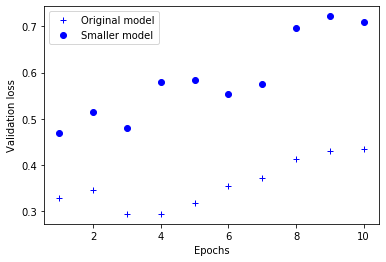

In [11]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


In [12]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [13]:

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=10,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 8s 171ms/step - loss: 0.4576 - acc: 0.8065 - val_loss: 0.3294 - val_acc: 0.8605
Epoch 2/10
49/49 [==============================] - 8s 169ms/step - loss: 0.2226 - acc: 0.9100 - val_loss: 0.3164 - val_acc: 0.8635
Epoch 3/10
49/49 [==============================] - 9s 184ms/step - loss: 0.1299 - acc: 0.9508 - val_loss: 0.3480 - val_acc: 0.8812
Epoch 4/10
49/49 [==============================] - 9s 175ms/step - loss: 0.0698 - acc: 0.9787 - val_loss: 0.4434 - val_acc: 0.8765
Epoch 5/10
49/49 [==============================] - 8s 164ms/step - loss: 0.0667 - acc: 0.9874 - val_loss: 0.4660 - val_acc: 0.8824
Epoch 6/10
49/49 [==============================] - 10s 198ms/step - loss: 0.0032 - acc: 0.9994 - val_loss: 3.6595 - val_acc: 0.6402
Epoch 7/10
49/49 [==============================] - 10s 203ms/step - loss: 0.0855 - acc: 0.9875 - val_loss: 0.6489 - val_acc: 0.8818
Epoch 8/10
49/49 [==============================] - 8s 172ms/step - loss: 

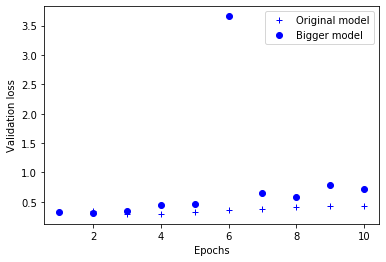

In [14]:

bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 
The bigger model is overfitting right away hence what to do in this situation
lets compare the loss from both

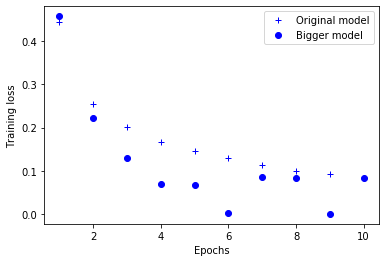

In [15]:

original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()


* As you can see, the bigger network gets its training loss near zero very quickly.
The more capacity the network has, the quicker it will be able to model the training data
(resulting in a low training loss), but the more susceptible 
it is to overfitting (resulting in a large difference between the training and validation loss).

### Wieght Regulization

In [18]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=10,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 2s 46ms/step - loss: 0.4974 - acc: 0.8219 - val_loss: 0.4156 - val_acc: 0.8497
Epoch 2/10
49/49 [==============================] - 2s 46ms/step - loss: 0.3197 - acc: 0.9048 - val_loss: 0.3457 - val_acc: 0.8818
Epoch 3/10
49/49 [==============================] - 2s 44ms/step - loss: 0.2723 - acc: 0.9195 - val_loss: 0.3503 - val_acc: 0.8778
Epoch 4/10
49/49 [==============================] - 3s 51ms/step - loss: 0.2526 - acc: 0.9270 - val_loss: 0.3454 - val_acc: 0.8820
Epoch 5/10
49/49 [==============================] - 2s 39ms/step - loss: 0.2405 - acc: 0.9310 - val_loss: 0.3401 - val_acc: 0.8853
Epoch 6/10
49/49 [==============================] - 2s 40ms/step - loss: 0.2293 - acc: 0.9377 - val_loss: 0.3482 - val_acc: 0.8827
Epoch 7/10
49/49 [==============================] - 2s 41ms/step - loss: 0.2247 - acc: 0.9395 - val_loss: 0.3617 - val_acc: 0.8782
Epoch 8/10
49/49 [==============================] - 2s 44ms/step - loss: 0.2177 - a

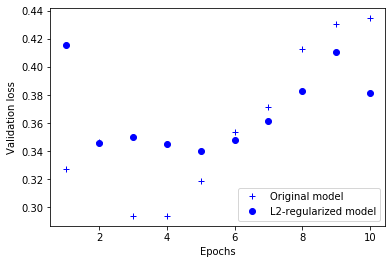

In [19]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [20]:

from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

### Adding Dropout



In [24]:
# At training time: we drop out 50% of the units in the output
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# At test time:
layer_output *= 0.5
# At training time:
layer_output *= np.randint(0, high=2, size=layer_output.shape)
# Note that we are scaling *up* rather scaling *down* in this case
layer_output /= 0.5

In [26]:
# model.add(layers.Dropout(0.5)) A Way to add dropout layers

### Creating a network with a dropout layer

In [27]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=10,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/10
49/49 [==============================] - 2s 46ms/step - loss: 0.5821 - acc: 0.6951 - val_loss: 0.4356 - val_acc: 0.8637
Epoch 2/10
36/49 [=====================>........] - ETA: 0s - loss: 0.4389 - acc: 0.8194

In [ ]:

dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()